In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso

### Load in Dataset

In [30]:
# Master Dataset
df = pd.read_csv('data/master_df.csv')

# Separate Datasets by Position
qbs = df[df['Position'] == 'QB']
rbs = df[df['Position'] == 'RB']
wrs = df[df['Position'] == 'WR']
tes = df[df['Position'] == 'TE']

# Model Development/Exploration

## Regressions

### QBs

In [ ]:
# Prep Dataset for Regressions with train_test_split
# To define the input and output feature
#qb_reduced_df = qbs[['Passing_TD%','Passing_Int%','Passing_1D','Passing_Lng','Passing_Y/A','Passing_AY/A','Passing_Y/C','Passing_Sk','Passing_Sk%','Passing_NY/A','Passing_ANY/A','Rushing_1D','Rushing_Lng','Rushing_Y/A_y','Fantasy_PPR']]
#qb_reduced_df = qb_reduced_df.dropna()
qb_reduced_df = pd.read_csv('data/qb_std_stats.csv', index_col=0)
qb_combine_df = pd.read_csv('data/qb_combine_stats.csv', index_col=0)
qb_stats_df = qb_reduced_df.merge(qb_combine_df)
x = qb_stats_df.drop('Fantasy_PPR', axis=1)
y = qb_stats_df['Fantasy_PPR']
### If want to scale data
#col_names = qb_reduced_df.columns
#scaler = StandardScaler()
#qb_reduced_normed = scaler.fit_transform(qb_reduced_df)
#qb_reduced_df_normed = pd.DataFrame(qb_reduced_normed, columns=col_names)
#x = qb_reduced_df_normed.drop('Fantasy_PPR', axis=1)
##x = np.column_stack([np.ones(len(x)),x.iloc[:,0].values.reshape(1,-1)[0]])
#y = qb_reduced_df_normed['Fantasy_PPR']
##y = y.values.reshape(1,-1)

#x_normed = scaler.fit_transform(x)
#y_normed = scaler.fit_transform(y)

# train and test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)




In [ ]:
# Ordinary Least Squares using using fit and predict QB Fantasy Points
print('OLS Linear Regression Model')
ols_reg = LinearRegression()
model_ols = ols_reg.fit(x_train,y_train)
y_preds_ols = model_ols.predict(x_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds_ols))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds_ols))
# Print Importance Coefficients
cdf = pd.DataFrame(model_ols.coef_, x.columns, columns=['OLS Coefficients'])
print(cdf)

# Plot outputs
plt.scatter(x_test.iloc[:,22].values, y_test, color="black")
plt.plot(x_test.iloc[:,22].values, y_preds_ols, '.', color="blue")

plt.show()

- QB:
    - Int% == Less than 3%
    - Lng == Greater than 50
    - Y/A == Greater than 7
    - AY/A == Greater than 7
    - Y/C == Greater than 11
    - Sk% == Less than 7
    - NY/A == Greater than 6.5
    - ANY/A == Greater than 5.5
    - Vertical == Greater than 31
    - 3Cone = Less than 7.2
    

In [144]:
# List of QBs with that fit optimal Fantasy QB Criteria
qbs_best_projected = qbs[(qbs['Passing_Int%'] < 3) & (qbs['Passing_Lng'] > 50) & (qbs['Passing_Y/A'] > 7) & (qbs['Passing_AY/A'] > 7) & (qbs['Passing_Y/C'] > 11) & (qbs['Passing_Sk%'] < 7) & (qbs['Passing_NY/A'] > 6.5) & (qbs['Passing_ANY/A'] > 5.5) & (qbs['Vertical'] > 31) & (qbs['3Cone'] < 7.2)]

"""
top_5_qbs = qbs_best_projected[qbs_best_projected['Year'] >= 2019]
top_5_qbs = top_5_qbs.sort_values(by=['Rank'])
top_5_qbs = top_5_qbs['Player'].unique()
top_5_qbs = top_5_qbs[0:5]

with open("top_5_qbs.txt", "w") as output:
    output.write(str(top_5_qbs))
"""

top_qbs = qbs_best_projected[(qbs_best_projected['Year'] >= 2017) & (qbs_best_projected['Fantasy_PosRank'] <= 10)]
top_qbs_agg = top_qbs.groupby('Player').agg({'Fantasy_PosRank': ['mean', 'std'], 'Year': 'count', 'Rank': 'mean'}).reset_index()
#top_tes_agg.sort_values([('Year','count'),('Rank','mean')],ascending=False)
top_qbs_agg_sorted = top_qbs_agg.sort_values([('Fantasy_PosRank','mean')])

with open("top_qbs_agg_sorted.txt", "w") as output:
    output.write(str(top_qbs_agg_sorted))

In [ ]:
# Ridge regression
print('Ridge Linear Regression Model')
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train,y_train)
y_preds_ridge = ridge_reg.predict(x_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds_ridge))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds_ridge))
# Print Importance Coefficients
cdf = pd.DataFrame(ridge_reg.coef_, x.columns, columns=['Ridge Reg Coefficients'])
print(cdf)

In [ ]:
# Lasso regression
print('Lasso Linear Regression Model')
lasso_reg = Lasso(alpha=0.5)
lasso_reg.fit(x_train,y_train)
y_preds_lasso = lasso_reg.predict(x_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds_lasso))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds_lasso))
# Print Importance Coefficients
cdf = pd.DataFrame(lasso_reg.coef_, x.columns, columns=['Lasso Reg Coefficients'])
print(cdf)

In [ ]:
# Ordinary Least Squares using makepipeline
#qb_reduced_df = qbs[['Passing_TD%','Passing_Int%','Passing_1D','Passing_Lng','Passing_Y/A','Passing_AY/A','Passing_Y/C','Passing_Sk','Passing_Sk%','Passing_NY/A','Passing_ANY/A','Rushing_1D','Rushing_Lng','Rushing_Y/A_y','Fantasy_PPR']]
#qb_reduced_df = qb_reduced_df.dropna()
#x = qb_reduced_df.drop('Fantasy_PPR', axis=1)
#y = qb_reduced_df['Fantasy_PPR']
# train and test split
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)
# Make pipeline
pipe = make_pipeline(StandardScaler(), LinearRegression())
# Fit Model
pipe.fit(x_train,y_train)
# Print Score
print("The R-squared Score was: "+str(pipe.score(x_test,y_test)))
print('')
# Print Importance Coefficients
cdf = pd.DataFrame(pipe.named_steps['linearregression'].coef_, x.columns, columns=['Coefficients'])
print(cdf)

# Plot outputs
#plt.scatter(x_test[:,np.newaxis], y_test, color="black")
#plt.plot(x_test.iloc[:,np.newaxis].values, y_preds_ols, color="blue", linewidth=3)

plt.show()

In [ ]:
# Support Vector Regression (Regression Version of Support Vector Machine)
from sklearn import svm

svr = svm.SVR()
svr.fit(x_train,y_train)
y_preds_svr = svr.predict(x_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds_svr))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds_svr))

### RBs

In [55]:
# Load in RB data
rb_reduced_df = pd.read_csv('data/rb_std_stats.csv', index_col=0)
rb_combine_df = pd.read_csv('data/rb_combine_stats.csv', index_col=0)
rb_stats_df = rb_reduced_df.merge(rb_combine_df)
x = rb_stats_df.drop('Fantasy_PPR', axis=1)
y = rb_stats_df['Fantasy_PPR']

# train and test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

OLS Linear Regression Model
Mean squared error: 710.43
Coefficient of determination: 0.83
                 OLS Coefficients
Age                      0.653679
Rushing_1D               2.879772
Rushing_Lng              0.767549
Rushing_Y/A_y           -0.054387
Receiving_Ctch%          0.182034
Receiving_Lng            1.683598
Receiving_Y/Tgt         -2.325629
Ht                     -14.868577
Wt                      -0.012272
40yd                    -9.706231
Vertical                -0.619379
Bench                    0.149948
BroadJump                0.054471
3Cone                  -16.889526
Shuttle                -12.603701
Combine_Year             0.156111


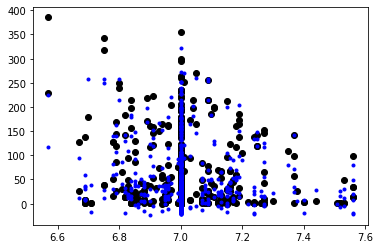

In [70]:
# Ordinary Least Squares using using fit and predict RB Fantasy Points
print('OLS Linear Regression Model')
ols_reg = LinearRegression()
model_ols = ols_reg.fit(x_train,y_train)
y_preds_ols = model_ols.predict(x_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds_ols))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds_ols))
# Print Importance Coefficients
cdf = pd.DataFrame(model_ols.coef_, x.columns, columns=['OLS Coefficients'])
print(cdf)

# Plot outputs
plt.scatter(x_test.iloc[:,13].values, y_test, color="black")
plt.plot(x_test.iloc[:,13].values, y_preds_ols, '.', color="blue")

plt.show()

- RB:
    - Age = 28 or younger
    - 1D = The higher the better, but at least 40
    - Rushing Lng = At least 25
    - Rushing Y/A = At least 4.0
    - Receiving Ctch% = Greater than 75
    - Receiving Lng = Greater than 15
    - Receiving Y/Tgt = Greater than 5
    - Ht = 5'10 or more
    - 40yd = 4.6 or less
    - 3Cone = 7.0 or less
    - Shuttle = 4.25 or less
    

In [143]:
# List of RBs with that fit optimal Fantasy RB Criteria
rbs['Age_in_2022'] = 2022 - rbs['Year'] + rbs['Age']
rbs_best_projected = rbs[(rbs['Age_in_2022'] <= 28) & (rbs['Rushing_1D'] > 40) & (rbs['Rushing_Lng'] > 25) & (rbs['Rushing_Y/A_x'] > 4) & (rbs['Receiving_Ctch%'] > 75) & (rbs['Receiving_Lng'] > 15) & (rbs['Receiving_Y/Tgt'] > 5) & (rbs['Ht'] > 5.8) & (rbs['40yd'] < 4.6) & (rbs['Shuttle'] < 4.25)]

"""
top_10_rbs = rbs_best_projected[rbs_best_projected['Year'] >= 2019]
top_10_rbs = top_10_rbs.sort_values(by=['Rank'])
top_10_rbs = top_10_rbs['Player'].unique()
top_10_rbs = top_10_rbs[0:10]

with open("top_10_rbs.txt", "w") as output:
    output.write(str(top_10_rbs))
"""

top_rbs = rbs_best_projected[(rbs_best_projected['Year'] >= 2017) & (rbs_best_projected['Fantasy_PosRank'] <= 30)]
top_rbs_agg = top_rbs.groupby('Player').agg({'Fantasy_PosRank': ['mean', 'std'], 'Year': 'count', 'Rank': 'mean'}).reset_index()
#top_tes_agg.sort_values([('Year','count'),('Rank','mean')],ascending=False)
top_rbs_agg_sorted = top_rbs_agg.sort_values([('Fantasy_PosRank','mean')])

with open("top_rbs_agg_sorted.txt", "w") as output:
    output.write(str(top_rbs_agg_sorted))


C:\Users\mattg\AppData\Local\Temp\ipykernel_14436\3106068198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rbs['Age_in_2022'] = 2022 - rbs['Year'] + rbs['Age']


### WRs

In [ ]:
# Load in WR data
wr_reduced_df = pd.read_csv('data/wr_std_stats.csv', index_col=0)
wr_combine_df = pd.read_csv('data/wr_combine_stats.csv', index_col=0)
wr_stats_df = wr_reduced_df.merge(wr_combine_df)
x = wr_stats_df.drop('Fantasy_PPR', axis=1)
y = wr_stats_df['Fantasy_PPR']

# train and test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
# Ordinary Least Squares using using fit and predict WR Fantasy Points
print('OLS Linear Regression Model')
ols_reg = LinearRegression()
model_ols = ols_reg.fit(x_train,y_train)
y_preds_ols = model_ols.predict(x_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds_ols))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds_ols))
# Print Importance Coefficients
cdf = pd.DataFrame(model_ols.coef_, x.columns, columns=['OLS Coefficients'])
print(cdf)

# Plot outputs
plt.scatter(x_test.iloc[:,11].values, y_test, color="black")
plt.plot(x_test.iloc[:,11].values, y_preds_ols, '.', color="blue")

plt.show()

- WR:
    - Age = Less than 30
    - Ctch% = Greater than 50%
    - Lng = Greater than 50 yds
    - Y/Tgt = Greater than 6.5
    - Ht = 5'10 or higher
    - Wt = 200lbs or higher
    - 40yd = 4.6 or less
    - Shutte = 4.3 or less

In [141]:
# List of WRs with that fit optimal Fantasy WR Criteria
wrs['Age_in_2022'] = 2022 - wrs['Year'] + wrs['Age']
wrs_best_projected = wrs[(wrs['Age_in_2022'] <= 30) & (wrs['Receiving_Ctch%'] > 50) & (wrs['Receiving_Lng'] > 50) & (wrs['Receiving_Y/Tgt'] > 6.5) & (wrs['Ht'] > 5.8) & (wrs['Wt'] > 200) & (wrs['40yd'] < 4.6) & (wrs['Shuttle'] < 4.3)]
"""
top_wrs = wrs_best_projected[(wrs_best_projected['Year'] >= 2019) & (wrs_best_projected['Fantasy_PosRank'] <= 30)]
top_wrs = top_wrs.sort_values(by=['Rank'])
top_wrs = top_wrs['Player'].unique()
#top_wrs = top_wrs[0:20]

with open("top_wrs.txt", "w") as output:
    output.write(str(top_wrs))
"""

top_wrs = wrs_best_projected[(wrs_best_projected['Year'] >= 2017) & (wrs_best_projected['Fantasy_PosRank'] <= 30)]
top_wrs_agg = top_wrs.groupby('Player').agg({'Fantasy_PosRank': ['mean', 'std'], 'Year': 'count', 'Rank': 'mean'}).reset_index()
#top_tes_agg.sort_values([('Year','count'),('Rank','mean')],ascending=False)
top_wrs_agg_sorted = top_wrs_agg.sort_values([('Fantasy_PosRank','mean')])

with open("top_wrs_agg_sorted.txt", "w") as output:
    output.write(str(top_wrs_agg_sorted))



C:\Users\mattg\AppData\Local\Temp\ipykernel_14436\3720808970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrs['Age_in_2022'] = 2022 - wrs['Year'] + wrs['Age']


### TEs

In [98]:
# Load in TE data
te_reduced_df = pd.read_csv('data/te_std_stats.csv', index_col=0)
te_combine_df = pd.read_csv('data/te_combine_stats.csv', index_col=0)
te_stats_df = te_reduced_df.merge(te_combine_df)
x = te_stats_df.drop('Fantasy_PPR', axis=1)
y = te_stats_df['Fantasy_PPR']

# train and test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

OLS Linear Regression Model
Mean squared error: 1448.66
Coefficient of determination: 0.45
                 OLS Coefficients
Age                      1.801570
Receiving_Ctch%          0.325998
Receiving_Lng            2.553922
Receiving_Y/Tgt         -3.875466
Ht                      36.764013
Wt                       0.223314
40yd                   -66.065731
Vertical                -0.934378
Bench                   -0.767787
BroadJump                0.631494
3Cone                   12.886364
Shuttle                -12.048933
Combine_Year            -0.854805


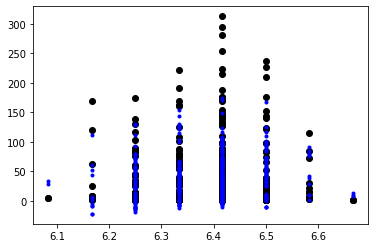

In [100]:
# Ordinary Least Squares using using fit and predict TE Fantasy Points
print('OLS Linear Regression Model')
ols_reg = LinearRegression()
model_ols = ols_reg.fit(x_train,y_train)
y_preds_ols = model_ols.predict(x_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds_ols))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds_ols))
# Print Importance Coefficients
cdf = pd.DataFrame(model_ols.coef_, x.columns, columns=['OLS Coefficients'])
print(cdf)

# Plot outputs
plt.scatter(x_test.iloc[:,4].values, y_test, color="black")
plt.plot(x_test.iloc[:,4].values, y_preds_ols, '.', color="blue")

plt.show()

### For choosing players, OLS suggests...
- TE:
    - Age = Any less than 35
    - Cth% = Greater than 60%
    - Lng = Greater than 30 yds
    - Height = 6'5
    - Weight = 240 to 260
    - 40 = 4.6 to 4.8
    - Vert = 30 to 36
    - 3Cone = Less than 7.2
    - Shuttle = Less than 4.5

In [101]:
# List of WRs with that fit optimal Fantasy WR Criteria
tes['Age_in_2022'] = 2022 - tes['Year'] + tes['Age']
tes_best_projected = tes[(tes['Age_in_2022'] <= 35) & (tes['Receiving_Ctch%'] > 60) & (tes['Receiving_Lng'] > 30) & (tes['Ht'] > 6.3) & (tes['Wt'] > 240) & (tes['40yd'] < 4.8) & (tes['Vertical'] >= 30) & (tes['3Cone'] < 7.2) & (tes['Shuttle'] < 4.5)]

top_tes = tes_best_projected[(tes_best_projected['Year'] >= 2019) & (tes_best_projected['Fantasy_PosRank'] <= 10)]
top_tes = top_tes.sort_values(by=['Rank'])
top_tes = top_tes['Player'].unique()
#top_tes = top_tes[0:20]

with open("top_tes.txt", "w") as output:
    output.write(str(top_tes))

C:\Users\mattg\AppData\Local\Temp\ipykernel_14436\3006769504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes['Age_in_2022'] = 2022 - tes['Year'] + tes['Age']


In [116]:
top_tes = tes_best_projected[(tes_best_projected['Year'] >= 2017) & (tes_best_projected['Fantasy_PosRank'] <= 10)]
top_tes_count = top_tes.Player.value_counts()
#top_tes.groupby('Player').agg({'Rank': ['mean', 'std'], 'Year': 'count'})

with open("top_tes_count.txt", "w") as output:
    output.write(str(top_tes_count))

In [138]:
top_tes_agg = top_tes.groupby('Player').agg({'Fantasy_PosRank': ['mean', 'std'], 'Year': 'count', 'Rank': 'mean'}).reset_index()
#top_tes_agg.sort_values([('Year','count'),('Rank','mean')],ascending=False)
top_tes_agg_sorted = top_tes_agg.sort_values([('Fantasy_PosRank','mean')])

with open("top_tes_agg_sorted.txt", "w") as output:
    output.write(str(top_tes_agg_sorted))


In [139]:
top_tes_agg_sorted

Player Fantasy_PosRank            Year       Rank
                              mean       std count       mean
1   Dalton Schultz        3.000000       NaN     1  35.000000
4    George Kittle        3.000000  1.000000     3  23.000000
9   T.J. Hockenson        5.000000       NaN     1  52.000000
10       Zach Ertz        5.333333  4.041452     3  33.333333
5       Jared Cook        5.500000  0.707107     2  32.000000
3      Dawson Knox        6.000000       NaN     1  50.000000
7     Mike Gesicki        6.000000       NaN     1  56.000000
0    Austin Hooper        7.000000  0.000000     2  47.500000
2      David Njoku        8.000000       NaN     1  65.000000
6       Kyle Pitts        9.000000       NaN     1  59.000000
8      O.J. Howard       10.000000       NaN     1  68.000000